### Guidelines

This notebook is to practice ways of OverSampling and UnderSampling the dataset to keep practicing and enhance knowledge while keeping practice.


The dataset has been taken from kaggle:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


Algorithms that will be used and to make comparation are Logistic Regression and Random Tree Forest.


According to the kaggle guidelines the values V1 up to the last one V28, weren't disclosed due to security and privacy issues. However, the amount of the transaction and the class where indicates if it is a Fraudulent or not transaction appears as the last 2 columns.

In [1]:
import pandas as pd

data = pd.read_csv('creditcard.csv')

### Visualizing the data

In [2]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
## Splitting the data into X and y
### Class = if a transaction is fraudulent or not.
X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
## Visualizing the value counts of the fraud class
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:ylabel='Class'>

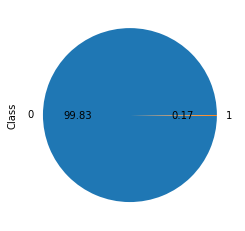

In [7]:
## Visualizing graphically
y.value_counts().plot.pie(autopct='%.2f')

The proportion is really umbalanced, where if applied to a model it would give probably near 100% accuracy and the model wouldn't be reliable.

Therefore, some balancing needs to be done. As per practice and to visualize better I will be doing the model without balancing as well as balancing to compare the results.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,
                                                    stratify=y,
                                                    random_state = 36)

## Preparing the models with imbalanced data

### Using Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = lr_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

accuracy_score(y_test,y_pred)

0.9991994606893064

As mentioned before, the accuracy is nearly 100% which will lead to a lot of missclassified operation.

In [12]:
# Checking the confusion matrix
confusion_matrix(y_test,y_pred)

array([[71060,    19],
       [   38,    85]], dtype=int64)

In [13]:
'''
Checking the value of recall to identify how many fraudulent operations can be found.
For this type of problem using recall is a better evaluation metrics to identify how the model is 
performing.
'''
# Checking the recall
recall_lr = recall_score(y_test,y_pred)
recall_lr

0.6910569105691057

In [14]:
### Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [15]:
## Fitting the model
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# Making the prediction of the model
y_pred_dt = dt_clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred_dt)

0.9990590151962023

In [18]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_dt)

array([[71041,    38],
       [   29,    94]], dtype=int64)

In [19]:
# Checking the recall
recall_dt = recall_score(y_test,y_pred_dt)
recall_dt

0.7642276422764228

### Applying Under and OverSampling methods and checking results

### UnderSampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='Class'>

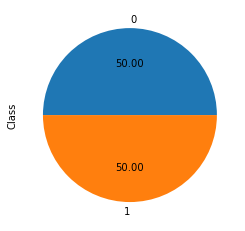

In [21]:
## Visualizing the balance graphically
y_res.value_counts().plot.pie(autopct='%.2f')

In [22]:
y_res.value_counts()

0    369
1    369
Name: Class, dtype: int64

### Applying Logistic Regression Model

In [23]:
## Defining the LR model
lr_under_clf = LogisticRegression(max_iter=1000)

## Fitting the model
lr_under_clf = lr_under_clf.fit(x_res,y_res)

## Predicting the model
ylr_under_pred = lr_under_clf.predict(X_test)

In [24]:
accuracy_score(y_test,ylr_under_pred)

0.9487093059183731

In [25]:
# Confusion Matrix
confusion_matrix(y_test,ylr_under_pred)

array([[67439,  3640],
       [   12,   111]], dtype=int64)

In [26]:
## Checking the recall of the model
recall_lrunder = recall_score(y_test, ylr_under_pred)
recall_lrunder

0.9024390243902439

### Applying to Decision Tree

In [27]:
## Defining the LR model
dt_under_clf = DecisionTreeClassifier()

## Fitting the model
dt_under_clf = dt_under_clf.fit(x_res,y_res)

## Predicting the model
ydt_under_pred = dt_under_clf.predict(X_test)

In [28]:
# Accuracy Score
accuracy_score(y_test,ydt_under_pred)

0.8780090446897559

In [29]:
# Confusion Matrix
confusion_matrix(y_test,ydt_under_pred)

array([[62400,  8679],
       [    7,   116]], dtype=int64)

In [30]:
## Checking the recall of the model
recall_dtunder = recall_score(y_test, ydt_under_pred)
recall_dtunder

0.943089430894309

Just checking the 3 different metrics of evaluation it's visible the improvement of the model on the first attempt of making the model more reliable at the first momment. 

Now will be applying the OverSampler to check if there is a difference between the 2 methods.

### OverSampling

In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='Class'>

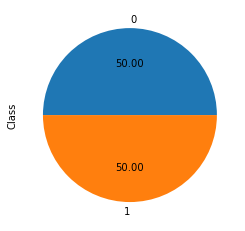

In [32]:
## Visualizing the balance graphically
y_ros.value_counts().plot.pie(autopct='%.2f')

In [33]:
y_ros.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

### Applying to Logistic Regression

In [34]:
## Defining the LR model
lr_over_clf = LogisticRegression(max_iter=1000)

## Fitting the model
lr_over_clf = lr_over_clf.fit(x_ros,y_ros)

## Predicting the model
ylr_over_pred = lr_over_clf.predict(X_test)

In [35]:
accuracy_score(y_test,ylr_over_pred)

0.9633577708491334

In [36]:
# Confusion Matrix
confusion_matrix(y_test,ylr_over_pred)

array([[68483,  2596],
       [   13,   110]], dtype=int64)

In [37]:
## Checking the recall of the model
recall_lrover = recall_score(y_test, ylr_over_pred)
recall_lrover

0.8943089430894309

### Applying to Decision Tree

In [38]:
## Defining the LR model
dt_over_clf = DecisionTreeClassifier()

## Fitting the model
dt_over_clf = dt_over_clf.fit(x_ros,y_ros)

## Predicting the model
ydt_over_pred = dt_over_clf.predict(X_test)

In [39]:
accuracy_score(y_test,ydt_over_pred)

0.9989466588017191

In [40]:
# Confusion Matrix
confusion_matrix(y_test,ydt_over_pred)

array([[71034,    45],
       [   30,    93]], dtype=int64)

In [41]:
## Checking the recall of the model
recall_lrover = recall_score(y_test, ydt_over_pred)
recall_lrover

0.7560975609756098

### Comparing graphically UnderSampling vs OverSampling

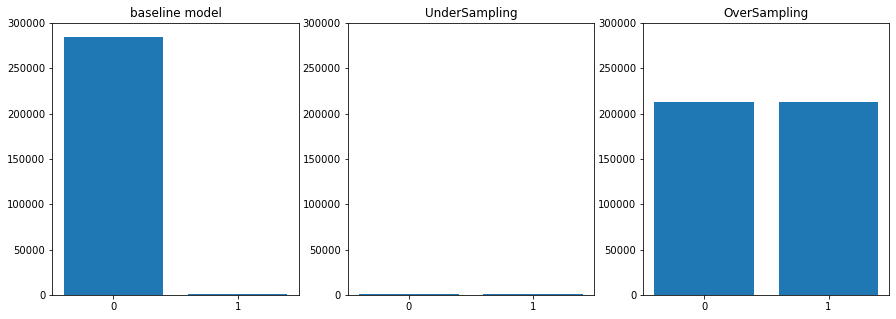

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols =3, figsize=(15,5))

ax[0].bar(y.value_counts().index,y.value_counts().values)
ax[1].bar(y_res.value_counts().index,y_res.value_counts().values)
ax[2].bar(y_ros.value_counts().index,y_ros.value_counts().values)

ax[0].set(ylim=(0,300000),xticks=[0,1])
ax[0].set_title('baseline model')
ax[1].set(ylim=(0,300000),xticks=[0,1])
ax[1].set_title('UnderSampling')
ax[2].set(ylim=(0,300000),xticks=[0,1])
ax[2].set_title('OverSampling')

plt.show()